# Shu-Ya Chiang

In [20]:
import nltk
import pickle
nltk.download('punkt')
nltk.download('stopwords')
import os
import re
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import torch
import numpy
from sklearn.decomposition import LatentDirichletAllocation
from numpy.testing import assert_almost_equal
import numpy as np
import pickle
from sklearn.externals import joblib
from nltk.stem import *

[nltk_data] Downloading package punkt to C:\Users\Shuya
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shuya
[nltk_data]     C\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
file2=open("df_k20.pkl",'rb') 
df_new20=pickle.load(file2)

# USING TO SAMPLE TO SUBSET 9000 ARTICLES

In [3]:
file=open("cleaned_sample.pkl",'rb')
df=pickle.load(file)

In [4]:
bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
bow_matrix = bow_vect.fit_transform(df['BoW'])

In [5]:
vectorizer = TfidfVectorizer(max_features=4000)
tfidf_bow = vectorizer.fit_transform(df['BoW'])

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
tfid_matrix_reduced= pca.fit_transform(tfidf_bow.toarray())
tfid_matrix_reduced.shape

(9000, 2050)

In [7]:
#choose k for kmean with Elbow method 
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 51))
for k in list_k:
    Kmean = KMeans(n_clusters=k)
    Kmean.fit(tfid_matrix_reduced)
    sse.append(Kmean.inertia_)

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Text(0, 0.5, 'Sum of squared distance')

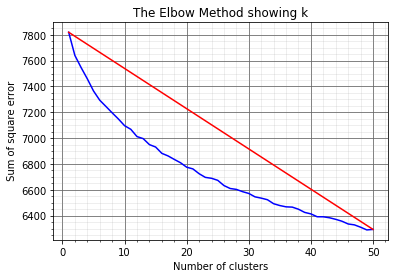

In [10]:
x = [list_k[0], list_k[-1]]
y = [sse[0], sse[-1]]

# Plot the elbow
plt.plot(list_k, sse, 'b-')
plt.plot(x, y, 'r')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of square error')
plt.title('The Elbow Method showing k')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [11]:
k = 20 
kmeans = KMeans(n_clusters=k, random_state=14)
y_pred = kmeans.fit_predict(tfid_matrix_reduced)
df['y'] = y_pred

In [27]:
df

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,BoW,y
22531,cd17443640ef463c670a9dfc10cedc8dd2402921,"Sphenisciformes, Gaviiformes, Podicipediformes...","Mark F Stidworthy, Daniela Denk","Mark F Stidworthy (Keighley, West Yorkshire, U...",2005. Pathological features in marine birds af...,The avian order Aequorlitornithes consists of ...,Poxviruses and Australian Wild Birds. Wildlife...,"[{'first': 'Mark', 'middle': ['F'], 'last': 'S...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Poxviru...",avian order aequorlitornith consist shorebird ...,7
9581,ff78beee1e6b1052a3578f330c8f820c60411340,Characterization of Sudan Ebolavirus infection...,"Andrea Kroeker, Shihua He, Marc-Antoine De, La...","Andrea Kroeker (Winnipeg, Manitoba, Canada, Pu...",Sudan virus (SUDV) outbreaks in Africa are hig...,The Filoviridae family consists of the Ebolavi...,Successful treatment of advanced Ebola virus i...,"[{'first': 'Andrea', 'middle': [], 'last': 'Kr...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Success...",filovirida famili consist ebolaviru marburgvir...,16
11302,1aa4f522ff888f160fe1d69a7d3691169fe8efb8,Translational errors: from yeast to new therap...,"Laure Bidou, Jean-Pierre Rousset, Olivier Namy","Laure Bidou (Orsay, France, IGM CNRS), Jean-Pi...",Errors occur randomly and at low frequency dur...,Ribosomes consist of two ribonucleoprotein sub...,Selenoprotein synthesis: UGA does not end the ...,"[{'first': 'Laure', 'middle': [], 'last': 'Bid...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Selenop...",ribosom consist two ribonucleoprotein subunit ...,7
5251,76585719cd2c0b067b878acf53964015a47bb917,Altered Gut Microbiota Profiles in Sows and Ne...,"Deping Song, Qi Peng, Yanjun Chen, Xinrong Zho...","Deping Song, Qi Peng, Yanjun Chen, Xinrong Zho...",Most of studies have focused on molecular and ...,have also demonstrated GM perturbations from p...,New variants of porcine epidemic diarrhea viru...,"[{'first': 'Deping', 'middle': [], 'last': 'So...","{'BIBREF0': {'ref_id': 'b0', 'title': 'New var...",also demonstr gm perturb phylum genu level afo...,0
20458,ab6cacc968914d56cd1bd3b1d64657caabef9d51,"Discovery of N-(benzo[1,2,3]triazol-1-yl)-N- (...","Mark Turlington, Aspen Chun, Sakshi Tomar, Aim...","Mark Turlington (37232, Nashville, TN, USA, Va...",Herein we report the discovery and SAR of a no...,"Coronaviruses (CoV) are enveloped, large plus-...","Human coronovirus infections, S H Myint, , 199...","[{'first': 'Mark', 'middle': [], 'last': 'Turl...","{'BIBREF1': {'ref_id': 'b1', 'title': 'Human c...",coronavirus cov envelop larg plusstrand rna vi...,1
9083,eef61bdfa49b8652fd660b5b8b7e74cf51922505,Changes in pulmonary tuberculosis prevalence: ...,"Xiaolin Wei, Xiulei Zhang, Jia Yin, John Walle...","Xiaolin Wei, Xiulei Zhang, Jia Yin, John Walle...",Background: This paper reports findings from t...,"China, with an estimated prevalence of all TB ...","Geneva: World Health Organization, , WHO: Glob...","[{'first': 'Xiaolin', 'middle': [], 'last': 'W...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Geneva:...",china estim preval tb case per second highest ...,16
9410,f9700deed61ea92d41891cf29eccddac0ee0ca15,Hydrogen sulfide ameliorates chronic renal fai...,"Dongdong Wu, Ning Luo, Lianqu Wang, Zhijun Zha...","Dongdong Wu (475004, Kaifeng, Henan, China, He...",Chronic renal failure (CRF) is a major public ...,Animals. Twenty-four male Wistar rats (7-9 wee...,An integrated lipidomics and metabolomics reve...,"[{'first': 'Dongdong', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'An inte...",anim twentyfour male wistar rat week old initi...,16
23999,e3c2df2221f21ddbb5ece5f094fa307e26b79e9e,Regulation of nucleocytoplasmic trafficking of...,"Alex J Fulcher, David A Jans","Alex J Fulcher (Victoria, Clayton, Australia, ...",Signal-dependent targeting of proteins into an...,"The mammalian cell is a highly organised, dyna...",Karyopherins: from nuclear-transport mediators...,"[{'first': 'Alex', 'middle': 

In [13]:
corpus = df.BoW.str.split()

In [17]:
!pip install gensim
from gensim.test.utils import common_corpus, common_dictionary
from gensim.corpora import Dictionary
from gensim import corpora, models
dictionary = Dictionary(corpus)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0 abdomin
1 aberr
2 abnorm
3 abollo
4 abrad
5 abras
6 abro
7 absenc
8 absent
9 abund
10 acanthocephalan


In [18]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]

HDP MODEL

In [24]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel

In [25]:
hdp = HdpModel(bow_corpus, dictionary)

In [26]:
topic_info = hdp.print_topics(num_topics=20, num_words=10)
topic_info

[(0,
  '0.006*rna + 0.004*mice + 0.004*figur + 0.004*bind + 0.004*antibodi + 0.004*interact + 0.003*replic + 0.003*genom + 0.003*inhibit + 0.003*dna'),
 (1,
  '0.009*patient + 0.005*vaccin + 0.005*health + 0.003*influenza + 0.003*anim + 0.003*risk + 0.003*hospit + 0.003*outbreak + 0.003*antibodi + 0.002*age'),
 (2,
  '0.110*de + 0.055*le + 0.046*la + 0.026*à + 0.023*en + 0.019*une + 0.015*est + 0.015*dan + 0.013*par + 0.013*un'),
 (3,
  '0.008*patient + 0.004*care + 0.004*figur + 0.003*lncrna + 0.003*health + 0.003*tissu + 0.003*pneumonia + 0.003*compound + 0.003*improv + 0.003*mice'),
 (4,
  '0.098*de + 0.077*la + 0.045*en + 0.034*el + 0.029*lo + 0.021*que + 0.020*se + 0.019*con + 0.015*por + 0.015*del'),
 (5,
  '0.012*rna + 0.006*antibodi + 0.005*mrna + 0.005*figur + 0.004*incub + 0.004*bind + 0.004*vaccin + 0.004*inhibitor + 0.004*primer + 0.004*vector'),
 (6,
  '0.528*q + 0.006*preprint + 0.004*licens + 0.004*medrxiv + 0.004*week + 0.003*epidem + 0.003*qq + 0.003*polici + 0.003*inc

In [28]:
bow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
bow_matrix = bow_vect.fit_transform(df['BoW'])
joblib.dump(bow_matrix, 'count_vectorized2.csv')

['count_vectorized2.csv']

# LDA

In [29]:
number_topics=20
LDA = LatentDirichletAllocation(n_components = number_topics, max_iter = 10, 
                                learning_offset = 50.,random_state = 14,
                                learning_method = 'online')
lda_out=LDA.fit(bow_matrix)
t_features = bow_vect.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([t_features[i] for i in topic.argsort()[:-number_topics - 1:-1]]))

Topic 0:
patient studi hospit use care particip risk medic health infect sar group measur includ control report healthcar nurs clinic level
Topic 1:
cell protein rna express viral infect fig replic use viru figur transfect mrna activ result gene transcript plasmid sirna mutant
Topic 2:
cell antibodi use infect viru incub protein cultur fig serum assay titer control dilut plate day wash mab group min
Topic 3:
al et viral infect viru protein cell virus replic host membran rna activ studi suggest interact type howev role function
Topic 4:
merscov preprint calv licens copyright holder peerreview http authorfund medrxiv doi avail display grant day intern zinc calf mer biorxiv
Topic 5:
la le en et zikv une est di que el se dan par lo du ou il ce denv del
Topic 6:
anim infect diseas cat pathogen speci human dog pig studi intestin et al caus farm host diarrhea associ includ clinic
Topic 7:
vaccin immun viru infect respons cell antibodi viral human antigen protect use develop virus influenza mi

In [30]:
lda_output = LDA.fit_transform(bow_matrix)

In [31]:
import gensim
num_topic = 20
ldamodel = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics = num_topic, id2word=dictionary, passes=15)
ldamodel.save('sample_model.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.008*"compound" + 0.008*"air" + 0.008*"particl" + 0.008*"temperatur" + 0.007*"extract" + 0.007*"water" + 0.006*"ml" + 0.006*"solut" + 0.006*"plant" + 0.006*"bacteria"')
(1, '0.018*"predict" + 0.007*"score" + 0.007*"figur" + 0.006*"approach" + 0.006*"databas" + 0.006*"network" + 0.006*"calcul" + 0.006*"comput" + 0.006*"algorithm" + 0.005*"correl"')
(2, '0.128*"de" + 0.061*"le" + 0.046*"la" + 0.033*"à" + 0.025*"en" + 0.020*"une" + 0.018*"est" + 0.015*"dan" + 0.014*"par" + 0.014*"du"')
(3, '0.024*"influenza" + 0.022*"children" + 0.017*"age" + 0.016*"rsv" + 0.016*"patient" + 0.010*"pneumonia" + 0.010*"symptom" + 0.009*"hospit" + 0.008*"asthma" + 0.008*"ill"')
(4, '0.018*"domain" + 0.015*"residu" + 0.011*"bind" + 0.011*"membran" + 0.009*"interact" + 0.008*"mutat" + 0.008*"mutant" + 0.008*"amino" + 0.007*"rna" + 0.007*"fusion"')
(5, '0.059*"vaccin" + 0.025*"antibodi" + 0.017*"antigen" + 0.015*"protect" + 0.010*"mice" + 0.010*"epitop" + 0.009*"challeng" + 0.009*"influenza" + 0.008*"dna"

# LDA result fitting the bag of words by full body text

In [32]:
!pip install pyLDAvis
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [33]:
print("Log Likelihood: ", LDA.score(bow_matrix))
print("Perplexity: ", LDA.perplexity(bow_matrix))
print(LDA.get_params())

Log Likelihood:  -121217932.22698094
Perplexity:  956.1535792545019
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 50.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 14, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [34]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=20, random_state=14).fit_predict(lda_output)

In [35]:
df['lda_k'] = clusters

In [36]:
df

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,BoW,y,lda_k
22531,cd17443640ef463c670a9dfc10cedc8dd2402921,"Sphenisciformes, Gaviiformes, Podicipediformes...","Mark F Stidworthy, Daniela Denk","Mark F Stidworthy (Keighley, West Yorkshire, U...",2005. Pathological features in marine birds af...,The avian order Aequorlitornithes consists of ...,Poxviruses and Australian Wild Birds. Wildlife...,"[{'first': 'Mark', 'middle': ['F'], 'last': 'S...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Poxviru...",avian order aequorlitornith consist shorebird ...,7,13
9581,ff78beee1e6b1052a3578f330c8f820c60411340,Characterization of Sudan Ebolavirus infection...,"Andrea Kroeker, Shihua He, Marc-Antoine De, La...","Andrea Kroeker (Winnipeg, Manitoba, Canada, Pu...",Sudan virus (SUDV) outbreaks in Africa are hig...,The Filoviridae family consists of the Ebolavi...,Successful treatment of advanced Ebola virus i...,"[{'first': 'Andrea', 'middle': [], 'last': 'Kr...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Success...",filovirida famili consist ebolaviru marburgvir...,16,18
11302,1aa4f522ff888f160fe1d69a7d3691169fe8efb8,Translational errors: from yeast to new therap...,"Laure Bidou, Jean-Pierre Rousset, Olivier Namy","Laure Bidou (Orsay, France, IGM CNRS), Jean-Pi...",Errors occur randomly and at low frequency dur...,Ribosomes consist of two ribonucleoprotein sub...,Selenoprotein synthesis: UGA does not end the ...,"[{'first': 'Laure', 'middle': [], 'last': 'Bid...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Selenop...",ribosom consist two ribonucleoprotein subunit ...,7,1
5251,76585719cd2c0b067b878acf53964015a47bb917,Altered Gut Microbiota Profiles in Sows and Ne...,"Deping Song, Qi Peng, Yanjun Chen, Xinrong Zho...","Deping Song, Qi Peng, Yanjun Chen, Xinrong Zho...",Most of studies have focused on molecular and ...,have also demonstrated GM perturbations from p...,New variants of porcine epidemic diarrhea viru...,"[{'first': 'Deping', 'middle': [], 'last': 'So...","{'BIBREF0': {'ref_id': 'b0', 'title': 'New var...",also demonstr gm perturb phylum genu level afo...,0,13
20458,ab6cacc968914d56cd1bd3b1d64657caabef9d51,"Discovery of N-(benzo[1,2,3]triazol-1-yl)-N- (...","Mark Turlington, Aspen Chun, Sakshi Tomar, Aim...","Mark Turlington (37232, Nashville, TN, USA, Va...",Herein we report the discovery and SAR of a no...,"Coronaviruses (CoV) are enveloped, large plus-...","Human coronovirus infections, S H Myint, , 199...","[{'first': 'Mark', 'middle': [], 'last': 'Turl...","{'BIBREF1': {'ref_id': 'b1', 'title': 'Human c...",coronavirus cov envelop larg plusstrand rna vi...,1,7
9083,eef61bdfa49b8652fd660b5b8b7e74cf51922505,Changes in pulmonary tuberculosis prevalence: ...,"Xiaolin Wei, Xiulei Zhang, Jia Yin, John Walle...","Xiaolin Wei, Xiulei Zhang, Jia Yin, John Walle...",Background: This paper reports findings from t...,"China, with an estimated prevalence of all TB ...","Geneva: World Health Organization, , WHO: Glob...","[{'first': 'Xiaolin', 'middle': [], 'last': 'W...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Geneva:...",china estim preval tb case per second highest ...,16,9
9410,f9700deed61ea92d41891cf29eccddac0ee0ca15,Hydrogen sulfide ameliorates chronic renal fai...,"Dongdong Wu, Ning Luo, Lianqu Wang, Zhijun Zha...","Dongdong Wu (475004, Kaifeng, Henan, China, He...",Chronic renal failure (CRF) is a major public ...,Animals. Twenty-four male Wistar rats (7-9 wee...,An integrated lipidomics and metabolomics reve...,"[{'first': 'Dongdong', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'An inte...",anim twentyfour male wistar rat week old initi...,16,18
23999,e3c2df2221f21ddbb5ece5f094fa307e26b79e9e,Regulation of nucleocytoplasmic trafficking of...,"Alex J Fulcher, David A Jans","Alex J Fulcher (Victoria, Clayton, Australia, ...",Signal-dependent targeting of proteins into an...,"The mammalian cell is a highly organised, dyna...",Karyopherins: from nuclear-transport mediators...,"[{'fi

# Random forest to compare class label that was created by different approach

# K-means  label

In [37]:
from sklearn.model_selection import train_test_split
# test set size 23% of the data and the random seed 14
x_train, x_test, y_train, y_test = train_test_split(tfidf_bow.toarray(),df['y'], test_size=0.3, random_state=14)
print("x_train size:", len(x_train))
print("x_test size:", len(x_test))

x_train size: 6300
x_test size: 2700


In [38]:
from sklearn.model_selection import train_test_split
# test set size 23% of the data and the random seed 14
x_train2, x_test2, y_train2, y_test2 = train_test_split(tfidf_bow.toarray(),df['lda_k'], test_size=0.3, random_state=14)
print("x_train size:", len(x_train2))
print("x_test size:", len(x_test2))

x_train size: 6300
x_test size: 2700


In [39]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def classification_report(y_test, y_pred):
    print(" Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(y_test, y_pred))))
    print(" Precision: ", '{:,.3f}'.format(float(precision_score(y_test, y_pred, average='macro'))))
    print(" Recall: ", '{:,.3f}'.format(float(recall_score(y_test, y_pred, average='macro'))))
    print(" F1 score: ", '{:,.3f}'.format(float(f1_score(y_test, y_pred, average='macro'))))

In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [42]:
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl=rclf.fit(x_train, y_train)
y_pred_traindata = cross_val_predict(rclf, x_train, y_train, cv=5)
y_pred_test = r_mdl.predict(x_test)

In [43]:
print("RandomForest model - train set result:")
classification_report(y_train, y_pred_traindata)
print("RandomForest model  -test set result:")
classification_report(y_test, y_pred_test)

RandomForest model - train set result:
 Accuracy Score:  0.703
 Precision:  0.812
 Recall:  0.591
 F1 score:  0.621
RandomForest model  -test set result:
 Accuracy Score:  0.694


C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Precision:  0.772
 Recall:  0.598
 F1 score:  0.627


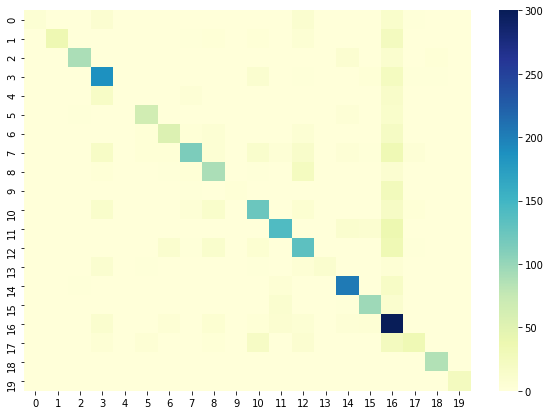

In [44]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cn_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
sn.heatmap(cn_matrix, annot=False,  cmap="YlGnBu", vmin=0, vmax=300)
plt.show()

# RandomForest LDA cluster of full body text output

In [45]:
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl2=rclf.fit(x_train2, y_train2)
y_pred_traindata2 = cross_val_predict(rclf, x_train2, y_train2, cv=5)
y_pred_test2 = r_mdl2.predict(x_test2)

In [46]:
print("RandomForest model - train set result LDA:")
classification_report(y_train2, y_pred_traindata2)
print("RandomForest model  -test set result LDA:")
classification_report(y_test2, y_pred_test2)

RandomForest model - train set result LDA:
 Accuracy Score:  0.703
 Precision:  0.739
 Recall:  0.702
 F1 score:  0.709
RandomForest model  -test set result LDA:
 Accuracy Score:  0.709
 Precision:  0.748
 Recall:  0.715
 F1 score:  0.720


In [47]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, y_pred_test2)

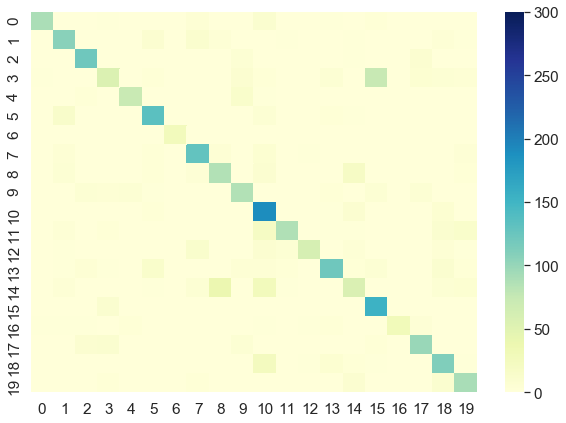

In [48]:
sn.set(font_scale=1.4) 
plt.figure(figsize = (10,7))
sn.heatmap(cnf_matrix, annot=False,  cmap="YlGnBu", vmin=0, vmax=300)
plt.show()

Text(0, 0.5, 'Count')

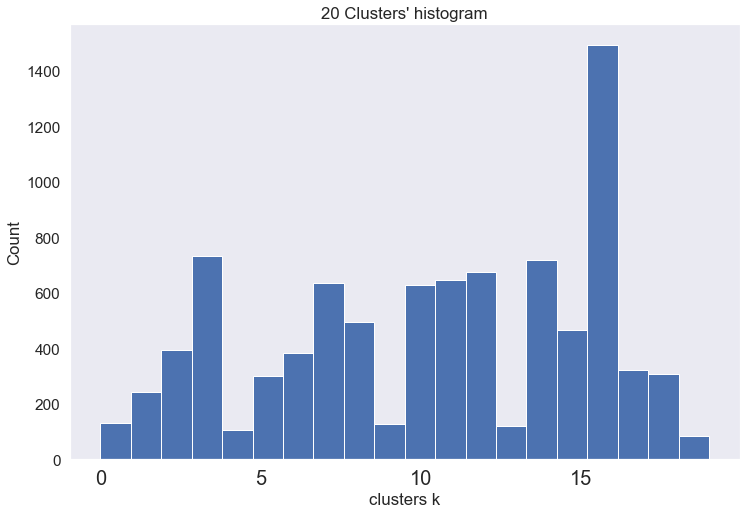

In [89]:
df.hist(column='y', bins=20, xlabelsize=int(20), grid = False, figsize=(12,8))
plt.title("20 Clusters' histogram")
plt.xlabel('clusters k')
plt.locator_params(axis='x', integer=True)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

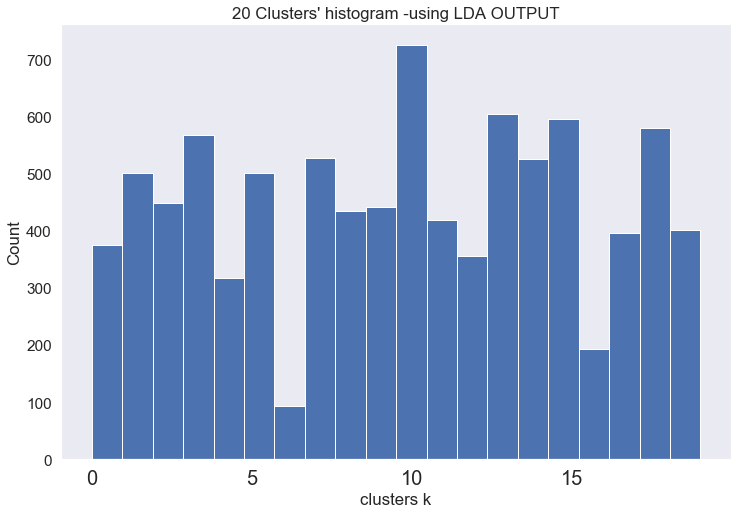

In [86]:
df.hist(column='lda_k', bins=20,xlabelsize=int(20), grid = False, figsize=(12,8))
plt.title("20 Clusters' histogram -using LDA OUTPUT")
plt.locator_params(axis='x', integer=True)
plt.xlabel('clusters k')
plt.ylabel('Count')

In [51]:
!pip install rank_bm25

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [52]:
from rank_bm25 import BM25Okapi
from sklearn.externals import joblib
model = BM25Okapi(corpus)
joblib.dump(model,'modelbm25.joblib')

['modelbm25.joblib']

In [53]:
from rank_bm25 import BM25Okapi
def search(query, n=5):
    'Search query return top n similar documents index '
    token_q = tokenization(query)
    #bm25 = BM25Okapi(corpus)
    doc_scores = model.get_scores(token_q)
    print(doc_scores[::-1][:n])
    top_n_doc = np.argsort(doc_scores)[::-1][:n]
    return top_n_doc

In [54]:
query='What is known about transmission, incubation, and environmental stability?'
q2='What do we know about COVID-19 risk factors?'
q3='What has been published about medical care?'
q4='What do we know about virus genetics, origin, and evolution?'
q5='Does smoking increase the risk of COVID?'

In [61]:
from nltk.stem import *
def tokenization(query):
  tokens = word_tokenize(query,language="english")
# convert to lower case
  tokens = [w.lower() for w in tokens]
# remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
  words = [word for word in stripped if word.isalpha()]
# filter out stop words
  custom_stop_words = [ 'doi',  'et', 'al','al.']
  stop_words=(stopwords.words('english'))
  stop_words = stop_words.extend(custom_stop_words)
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
# stemming of words - reducing each word to its root or base.
  porter = PorterStemmer()
  word = [porter.stem(word) for word in words]
  return word

In [77]:
import numpy as geek
q1=search(query,10)
print(type(q1))
print(df.y.iloc[q1],df.lda_k.iloc[q1])#using K=20

[4.8588271  0.         5.23637315 3.26636702 0.         2.71020493
 7.22901951 5.03956428 0.62508021 3.52753719]
<class 'numpy.ndarray'>
19540     2
9170     16
8145     16
7694      2
17650     2
25789     2
15596    16
14327    16
10794    16
2731     12
Name: y, dtype: int32 19540    11
9170     12
8145      3
7694      9
17650     4
25789     4
15596    13
14327    13
10794    13
2731     19
Name: lda_k, dtype: int32


In [92]:
QY1=df.iloc[q1]
QY1

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,BoW,y,lda_k
19540,9d3ab53e5184ee5e5a10ac40cf81a737608952f8,Factors determining human-to-human transmissib...,"Mathilde Richard, Sascha Knauf, Philip Lawrenc...","Mathilde Richard (Rotterdam, The Netherlands, ...",The pandemic potential of zoonotic pathogens l...,Infectious diseases are the second leading cau...,"particular interest, published within the peri...","[{'first': 'Mathilde', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'particu...",infecti diseas second lead caus death worldwid...,2,11
9170,f19e6df5a006cb83449f1ec0dd16a9aa6703b0dc,Evaluation of green tea extract as a safe pers...,"Yun Ha Lee, † , Han Jang, Young-Seok Kim, Jink...","Yun Ha Lee, † , Han Jang, Young-Seok Kim, Jink...",Background: Viral infections often pose tremen...,Virus infections continue to pose major public...,Temporal and spatial analysis of the 2014-2015...,"[{'first': 'Yun', 'middle': ['Ha'], 'last': 'L...","{'BIBREF1': {'ref_id': 'b1', 'title': 'Tempora...",viru infect continu pose major public health c...,16,12
8145,d171f82b892a2afafc2bc8a5458219dc04c8fd8d,Human Coronaviruses: Insights into Environment...,"Chloé Geller, Mihayl Varbanov, Raphaël E Duval","Chloé Geller (5 rue Albert Lebrun, BP 80403, 5...","The Coronaviridae family, an enveloped RNA vir...",The worldwide epidemic of SARS (Severe Acute R...,"Virus Taxonomy: 2011 Release (current), , ICTV...","[{'first': 'Chloé', 'middle': [], 'last': 'Gel...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Virus T...",worldwid epidem sar sever acut respiratori syn...,16,3
7694,c381a318060a8b093ebc7911198e0b7c509bf580,Challenges in developing methods for quantifyi...,"Giovanni Lo Iacono, Ben Armstrong, Lora E Flem...","Giovanni Lo Iacono (Chilton, United Kingdom, P...",Infectious diseases attributable to unsafe wat...,a1111111111 a1111111111 a1111111111 a111111111...,Planning for climate change: The need for mech...,"[{'first': 'Giovanni', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Plannin...",season geograph distribut infecti diseas curre...,2,9
17650,7ff84fba197a55522166ddd7f67f92ac98dc8870,Physica A The effect of media coverage on thre...,"Yu Zhao, Liping Zhang, Sanling Yuan","Yu Zhao (750004, Ningixa Yinchuan, China, Ning...",h i g h l i g h t s• A stochastic SIS epidemic...,Media coverage is one of the important measure...,"The top 10 causes of death, , , 2015; Media co...","[{'first': 'Yu', 'middle': [], 'last': 'Zhao',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The top...",media coverag one import measur control infect...,2,4
25789,ffeffafec5c5db2f5bd2472bac2f7c5cabe13557,Stability analysis of a novel epidemics model ...,"Defang Liu, Bochu Wang, Songtao Guo","Defang Liu (400044, Chongqing, China, Chongqin...","In this paper, by considering pathogen evoluti...",Infectious diseases result in 14.7 million dea...,Modelling infectious disease-time to think out...,"[{'first': 'Defang', 'middle': [], 'last': 'Li...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Modelli...",infecti diseas result million death global mor...,2,4
15596,5eb89ef1b9b8c83821dc226c368a9cf07e663614,Foodborne viruses 1,"Marion Koopmans, Carl-Henrik Von Bonsdor¡, Jan...","Marion Koopmans (3720 BA, Bilthoven, The Nethe...",Foodborne and waterborne viral infections are ...,The importance of foodborne transmission of vi...,Small round structured viruses (SRSV) : number...,"[{'first': 'Marion', 'middle': [], 'last': 'Ko...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Small r...",import foodborn transmiss virus increasingli r...,16,13
14327,4a73e5ac9bbb588a653204273f5761f91e248448,The human gut microbiota and virome: Potential...,"Emidio Scarpellini, Gianluca Ianiro, Fabia Att...","Emidio Scarpellini (Italy, Umberto I Universit...",Human gut microbiota is a complex ecosystem wi...,Before the surge of interest into neglected co...,"The human gut microbiome: current knowledge, c...","[{'first': 'Emidio', 'midd

In [93]:
import gensim 
from gensim.summarization.summarizer import summarize
txt=df.text[19540]
SUMM19540=summarize(txt, word_count = 100)
print(SUMM19540) #it's about word_count=50

We used the following examples to illustrate these four modes of contact transmission: Treponema pallidum pertenue (TPE) for skin contact transmission, human immunodeficiency virus type 1 (HIV-1) for sexual contact transmission, coronaviruses (CoV) for respiratory contact transmission and Ebola virus for contact transmission via multiple routes.
Other pathogen factors that have contributed to the 'success' of HIV-1 M strain as a human pathogen, despite its relatively low infectivity (risk estimate of 1 in 1000 exposures for heterosexual transmission; [9] ), include its extraordinary propensity to evolve its genome through recombination and low-fidelity replication, allowing immune and therapeutic escape [20] , the nature of its long, 'latent', often sub-clinical infection, during which patients can transmit the virus [21] , and high viral load.


# Text Rank summerize the article

In [101]:
TABLE=QY1.copy()

In [102]:
TABLE=TABLE.drop(columns=['paper_id','BoW','text','raw_authors', 'raw_bibliography','affiliations','bibliography' ])

In [103]:
TABLE

,title,authors,abstract,y,lda_k
19540,Factors determining human-to-human transmissib...,"Mathilde Richard, Sascha Knauf, Philip Lawrenc...",The pandemic potential of zoonotic pathogens l...,2,11
9170,Evaluation of green tea extract as a safe pers...,"Yun Ha Lee, † , Han Jang, Young-Seok Kim, Jink...",Background: Viral infections often pose tremen...,16,12
8145,Human Coronaviruses: Insights into Environment...,"Chloé Geller, Mihayl Varbanov, Raphaël E Duval","The Coronaviridae family, an enveloped RNA vir...",16,3
7694,Challenges in developing methods for quantifyi...,"Giovanni Lo Iacono, Ben Armstrong, Lora E Flem...",Infectious diseases attributable to unsafe wat...,2,9
17650,Physica A The effect of media coverage on thre...,"Yu Zhao, Liping Zhang, Sanling Yuan",h i g h l i g h t s• A stochastic SIS epidemic...,2,4
25789,Stability analysis of a novel epidemics model ...,"Defang Liu, Bochu Wang, Songtao Guo","In this paper, by considering pathogen evoluti...",2,4
15596,Foodborne viruses 1,"Marion Koopmans, Carl-Henrik Von Bonsdor¡, Jan...",Foodborne and waterborne viral infections are ...,16,13
14327,The human gut microbiota and virome: Potential...,"Emidio Scarpellini, Gianluca Ianiro, Fabia Att...",Human gut microbiota is a complex ecosystem wi...,16,13
10794,Foodborne viruses: an emerging problem,"Marion Koopmans, Erwin Duizer",Several groups of viruses may infect persons a...,16,13
2731,cAMP-dependent activation of protein kinase A ...,"Fariba Rezaee, Terri J Harford, Debra T Linfie...",Airway epithelium forms a barrier to the outsi...,12,19


In [104]:
txt=df.text[19540]
SUMM19540=summarize(txt, word_count=200)
TABLE.at[19540,'summary']=SUMM19540

In [105]:
txt=df.text[9170]
SUMM9170=summarize(txt, word_count = 200)
TABLE.at[9170,'summary']=SUMM9170

In [107]:
txt=df.text[8145]
SUMM8145=summarize(txt, word_count = 200)
TABLE.at[8145,'summary']=SUMM8145

In [108]:
txt=df.text[7694]
SUMM7694=summarize(txt, word_count = 200)
TABLE.at[7694,'summary']=SUMM7694

In [109]:
txt=df.text[17650]
SUMM17650=summarize(txt, word_count = 200)
TABLE.at[17650,'summary']=SUMM17650

In [110]:
txt=df.text[25789]
SUMM25789=summarize(txt, word_count = 200)
TABLE.at[25789,'summary']=SUMM25789

In [112]:
txt=df.text[15596]
SUMM15596=summarize(txt, word_count = 200)
TABLE.at[15596,'summary']=SUMM15596

In [113]:
txt=df.text[14327]
SUMM14327=summarize(txt, word_count = 200)
TABLE.at[14327,'summary']=SUMM14327

In [114]:
txt=df.text[10794]
SUMM10794=summarize(txt, word_count = 200)
TABLE.at[10794,'summary']=SUMM10794

In [115]:
txt=df.text[2731]
SUMM2731=summarize(txt, word_count = 200)
TABLE.at[2731,'summary']=SUMM2731

In [137]:
TABLE

,title,authors,abstract,y,lda_k,summary
19540,Factors determining human-to-human transmissib...,"Mathilde Richard, Sascha Knauf, Philip Lawrenc...",The pandemic potential of zoonotic pathogens l...,2,11,We used the following examples to illustrate t...
9170,Evaluation of green tea extract as a safe pers...,"Yun Ha Lee, † , Han Jang, Young-Seok Kim, Jink...",Background: Viral infections often pose tremen...,16,12,Toward finding a safe and effective hygiene ag...
8145,Human Coronaviruses: Insights into Environment...,"Chloé Geller, Mihayl Varbanov, Raphaël E Duval","The Coronaviridae family, an enveloped RNA vir...",16,3,These observations led to some speculations ab...
7694,Challenges in developing methods for quantifyi...,"Giovanni Lo Iacono, Ben Armstrong, Lora E Flem...",Infectious diseases attributable to unsafe wat...,2,9,These are difficult methodological and concept...
17650,Physica A The effect of media coverage on thre...,"Yu Zhao, Liping Zhang, Sanling Yuan",h i g h l i g h t s• A stochastic SIS epidemic...,2,4,The interesting findings are that (i) the envi...
25789,Stability analysis of a novel epidemics model ...,"Defang Liu, Bochu Wang, Songtao Guo","In this paper, by considering pathogen evoluti...",2,4,Our model differs from the existing ones in [1...
15596,Foodborne viruses 1,"Marion Koopmans, Carl-Henrik Von Bonsdor¡, Jan...",Foodborne and waterborne viral infections are ...,16,13,The NLV cause illness in people of all age gro...
14327,The human gut microbiota and virome: Potential...,"Emidio Scarpellini, Gianluca Ianiro, Fabia Att...",Human gut microbiota is a complex ecosystem wi...,16,13,While the Human Gut Microbiome project has she...
10794,Foodborne viruses: an emerging problem,"Marion Koopmans, Erwin Duizer",Several groups of viruses may infect persons a...,16,13,"(NoV-Noroviruses, HAV = hepatitis A viruses, P..."
2731,cAMP-dependent activation of protein kinase A ...,"Fariba Rezaee, Terri J Harford, Debra T Linfie...",Airway epithelium forms a barrier to the outsi...,12,19,The goal of this study was to test the hypothe...


In [152]:
TABLE.drop(columns=['abstract'])

,title,authors,y,lda_k,summary
19540,Factors determining human-to-human transmissib...,"Mathilde Richard, Sascha Knauf, Philip Lawrenc...",2,11,We used the following examples to illustrate t...
9170,Evaluation of green tea extract as a safe pers...,"Yun Ha Lee, † , Han Jang, Young-Seok Kim, Jink...",16,12,Toward finding a safe and effective hygiene ag...
8145,Human Coronaviruses: Insights into Environment...,"Chloé Geller, Mihayl Varbanov, Raphaël E Duval",16,3,These observations led to some speculations ab...
7694,Challenges in developing methods for quantifyi...,"Giovanni Lo Iacono, Ben Armstrong, Lora E Flem...",2,9,These are difficult methodological and concept...
17650,Physica A The effect of media coverage on thre...,"Yu Zhao, Liping Zhang, Sanling Yuan",2,4,The interesting findings are that (i) the envi...
25789,Stability analysis of a novel epidemics model ...,"Defang Liu, Bochu Wang, Songtao Guo",2,4,Our model differs from the existing ones in [1...
15596,Foodborne viruses 1,"Marion Koopmans, Carl-Henrik Von Bonsdor¡, Jan...",16,13,The NLV cause illness in people of all age gro...
14327,The human gut microbiota and virome: Potential...,"Emidio Scarpellini, Gianluca Ianiro, Fabia Att...",16,13,While the Human Gut Microbiome project has she...
10794,Foodborne viruses: an emerging problem,"Marion Koopmans, Erwin Duizer",16,13,"(NoV-Noroviruses, HAV = hepatitis A viruses, P..."
2731,cAMP-dependent activation of protein kinase A ...,"Fariba Rezaee, Terri J Harford, Debra T Linfie...",12,19,The goal of this study was to test the hypothe...


# LDA using bag of word model created by abstract

In [117]:
df['BoW_abst'] = " "
for index,row in df.iterrows():
    description = row['abstract']
    # split into words
    tokens = word_tokenize(description,language="english")
#   convert to lower case
    tokens = [w.lower() for w in tokens]
# remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
# filter out stop words
    custom_stop_words = [ 'doi',  'et', 'al','al.']
    stop_words=(stopwords.words('english'))
    stop_words = stop_words.extend(custom_stop_words)
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
# stemming of words - reducing each word to its root or base.
    porter = PorterStemmer()
    word = [porter.stem(word) for word in words]
    df.at[index,'BoW_abst'] = word
df['BoW_abst'] = [' '.join(map(str, l)) for l in df['BoW_abst']]

In [119]:
abs_corpus = df.BoW_abst.str.split()

In [121]:
!pip install gensim
from gensim import corpora, models
dictionary_abst = Dictionary(abs_corpus)
count = 0
for k, v in dictionary_abst.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0 affect
1 bird
2 featur
3 marin
4 north
5 oil
6 patholog
7 prestig
8 spain
9 spill
10 adapt


In [122]:
dictionary_abst.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
abstbow_corpus = [dictionary_abst.doc2bow(doc) for doc in abs_corpus]

In [123]:
abstbow_vect = CountVectorizer(analyzer='word',stop_words='english', max_features=4000)
abstbow_matrix = abstbow_vect.fit_transform(df['BoW_abst'])

In [124]:
number_topics=20
LDA = LatentDirichletAllocation(n_components = number_topics, max_iter = 10, 
                                learning_offset = 50.,random_state = 14,
                                learning_method = 'online')
lda_out2=LDA.fit(abstbow_matrix)
t_features = abstbow_vect.get_feature_names()
for t_id, topic in enumerate(LDA.components_):
    print ("Topic %d:" % (t_id))
    print (" ".join([t_features[i] for i in topic.argsort()[:-number_topics - 1:-1]]))

Topic 0:
patient group treatment day clinic sever blood sar acut level compar lung serum studi treat therapi pulmonari receiv significantli syndrom
Topic 1:
et la le al en text aerosol abstract di publish dan particl pubm free est van par que une du
Topic 2:
health public diseas emerg respons care surveil global intern outbreak infecti commun preprint ebola medic media countri lo licens disast
Topic 3:
mice infect strain viru prrsv diseas resist associ result tissu studi suscept genet day inocul group genotyp observ increas compar
Topic 4:
particip nurs train care mer student knowledg practic physician work questionnair profession worker educ score psycholog staff saudi healthcar inform
Topic 5:
pedv calv diarrhea pig porcin strain infect studi farm intestin bovin tgev swine piglet isol sampl rotaviru anim group enter
Topic 6:
respiratori infect patient children studi pneumonia age associ viral hospit year clinic rsv influenza case virus ci viru detect pathogen
Topic 7:
protein sequenc

In [125]:
lda_output2 = LDA.fit_transform(abstbow_matrix)

In [126]:
num_topic = 20
ldamodel2 = gensim.models.ldamodel.LdaModel(abstbow_corpus, num_topics = num_topic, id2word=dictionary_abst, passes=15)
ldamodel2.save('model2.gensim')
topics2 = ldamodel2.print_topics(num_words=10)

C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [127]:
import pyLDAvis.gensim
lda_display2 = pyLDAvis.gensim.prepare(ldamodel2, abstbow_corpus, dictionary_abst, sort_topics=False)
pyLDAvis.display(lda_display2)

C:\Users\Shuya C\Anaconda3\envs\dsc478\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [132]:
print("Log Likelihood: ", LDA.score(abstbow_matrix))
print("Perplexity: ", LDA.perplexity(abstbow_matrix))
print(LDA.get_params())

Log Likelihood:  -6690314.567163225
Perplexity:  983.9091486380701
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 50.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 14, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [133]:
from sklearn.cluster import KMeans
clusters2 = KMeans(n_clusters=20, random_state=14).fit_predict(lda_output2)

In [134]:
df['lda_k_abst'] = clusters2

Text(0, 0.5, 'Count')

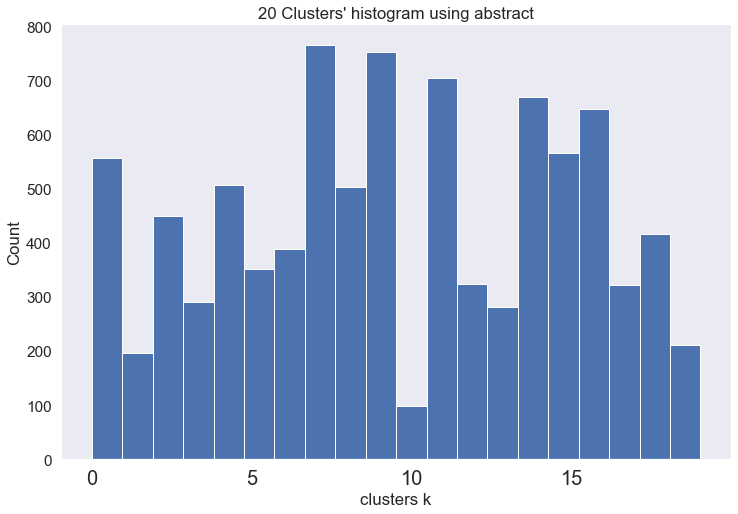

In [138]:
df.hist(column='lda_k_abst', bins=20, xlabelsize=int(20), grid = False, figsize=(12,8))
plt.title("20 Clusters' histogram using abstract")
plt.xlabel('clusters k')
plt.locator_params(axis='x', integer=True)
plt.ylabel('Count')

In [128]:
abst_model = BM25Okapi(abstbow_corpus)

In [141]:
token_q = tokenization(query)
#bm25 = BM25Okapi(corpus)
doc_scores = abst_model.get_scores(token_q)
#print(doc_scores[::-1][:10])
top_n_doc = np.argsort(doc_scores)[::-1][:10]
top_n_doc

array([8999, 2997, 3003, 3002, 3001, 3000, 2999, 2998, 2996, 3005],
      dtype=int64)

In [143]:
t1=df.iloc[top_n_doc]

In [144]:
TAB1=t1.drop(columns=['paper_id','BoW','text','raw_authors', 'raw_bibliography','affiliations','bibliography' ,'BoW_abst'])

In [151]:
TAB1

,title,authors,abstract,y,lda_k,lda_k_abst
15191,REVIEWS FROM ASN EB 2012 SYMPOSIA Discovery of...,"Adv, Nutr",The essentiality of zinc in humans was establi...,16,19,15
5317,Rhinovirus Genome Variation during Chronic Upp...,"C Tapparel, S Cordey, T Junier, L Farinelli, S...",Routine screening of lung transplant recipient...,3,3,2
16473,50 General Measures of Infection Control,"S N Myatra, J G Pulinilkunnathil, Sheila Naina...",Health-care-associated infections are a common...,11,17,2
1128,The Effectiveness of Social Distancing in Miti...,"George J Milne, Simon Xie",Organisation as a pandemic due to its worldwid...,18,9,11
24527,Host-directed therapies for bacterial and vira...,"Stefan H E Kaufmann, Anca Dorhoi, Richard S Ho...",| Despite the recent increase in the developme...,8,19,14
16336,Intragastric immunization with recombinant Lac...,"Akinobu Kajikawa, Eiichi Satoh, Rob J Leer, Sh...",A recombinant Lactobacillus casei expressing a...,5,10,8
2633,A Circulating miRNA Signature for Stratificati...,"Sau Yeen Loke, Prabhakaran Munusamy, Geok Ling...",Although mammography is the gold standard for ...,16,1,0
24770,Recombinant nucleocapsid protein-based IgG enz...,"Masayuki Saijo, Toshio Ogino, Fumihiro Taguchi...",The recombinant nucleocapsid protein (rNP) of ...,17,10,8
20861,Recombinant poxvirus vaccines in biomedical re...,"Ed , Andrew A Mercer, Axel Schmidt, Olaf Weber...",In biomedical research recombinant poxviruses ...,5,11,8
11168,Identification of intertypic recombinant infec...,"H W Chen, Y P Huang, C H Wang",Avian coronavirus infectious bronchitis virus ...,13,5,9


# train test splite

In [146]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(tfidf_bow.toarray(),df['lda_k_abst'], test_size=0.3, random_state=14)
print("x_train size:", len(x_train3))
print("x_test size:", len(x_test3))

x_train size: 6300
x_test size: 2700


# RandomForest LDA cluster of abstract output 

In [147]:
rclf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=3, random_state=14)  
r_mdl3=rclf.fit(x_train3, y_train3)
y_pred_traindata3 = cross_val_predict(rclf, x_train3, y_train3, cv=5)
y_pred_test3 = r_mdl3.predict(x_test3)

In [148]:
print("RandomForest model - train set result:")
classification_report(y_train3, y_pred_traindata3)
print("RandomForest model  -test set result:")
classification_report(y_test3, y_pred_test3)

RandomForest model - train set result:
 Accuracy Score:  0.515
 Precision:  0.544
 Recall:  0.467
 F1 score:  0.458
RandomForest model  -test set result:
 Accuracy Score:  0.527
 Precision:  0.562
 Recall:  0.482
 F1 score:  0.474
